*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

# Linear Regression

Linear regression is a basic predictive modeling method which use a simple line to "best" fit a given set of data.

![Linear Regression Example](https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg) (from wikipedia)

In this tutorial we will start with a quick intuitive walk-through of the mathematics behind this well-known problem, before seeing how before moving on to see how linear models can be generalized to account for more complicated patterns in data.

We begin with the standard imports:

In [1]:
# make sure to use kernel 3.9
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

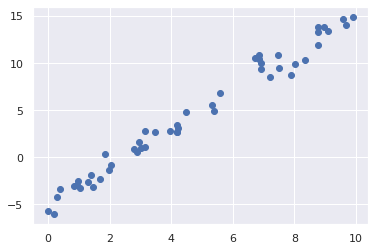

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

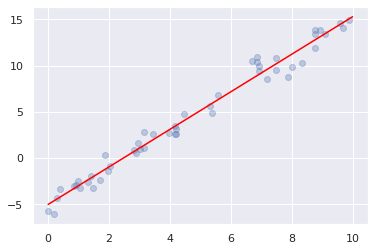

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y,alpha=0.3)
plt.plot(xfit, yfit,color='red');

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [6]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


The predicting linear model is:

$$y=2.027208810360696 x-4.9985770855532055$$

We see that the results are very close to the inputs, as we might hope.

The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [7]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
print(X)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

[[4.17022005e+00 7.20324493e+00 1.14374817e-03]
 [3.02332573e+00 1.46755891e+00 9.23385948e-01]
 [1.86260211e+00 3.45560727e+00 3.96767474e+00]
 [5.38816734e+00 4.19194514e+00 6.85219500e+00]
 [2.04452250e+00 8.78117436e+00 2.73875932e-01]
 [6.70467510e+00 4.17304802e+00 5.58689828e+00]
 [1.40386939e+00 1.98101489e+00 8.00744569e+00]
 [9.68261576e+00 3.13424178e+00 6.92322616e+00]
 [8.76389152e+00 8.94606664e+00 8.50442114e-01]
 [3.90547832e-01 1.69830420e+00 8.78142503e+00]
 [9.83468338e-01 4.21107625e+00 9.57889530e+00]
 [5.33165285e+00 6.91877114e+00 3.15515631e+00]
 [6.86500928e+00 8.34625672e+00 1.82882773e-01]
 [7.50144315e+00 9.88861089e+00 7.48165654e+00]
 [2.80443992e+00 7.89279328e+00 1.03226007e+00]
 [4.47893526e+00 9.08595503e+00 2.93614148e+00]
 [2.87775339e+00 1.30028572e+00 1.93669579e-01]
 [6.78835533e+00 2.11628116e+00 2.65546659e+00]
 [4.91573159e+00 5.33625451e-01 5.74117605e+00]
 [1.46728575e+00 5.89305537e+00 6.99758360e+00]
 [1.02334429e+00 4.14055988e+00 6.944001

Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

## Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.
We have seen one version of this before, in the ``PolynomialRegression`` pipeline used in [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) and [Feature Engineering](05.04-Feature-Engineering.ipynb).
The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x2 = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x2[:, None])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value.
This new, higher-dimensional data representation can then be plugged into a linear regression.

As we saw in [Feature Engineering](05.04-Feature-Engineering.ipynb), the cleanest way to accomplish this is to use a pipeline.
Let's make a 7th-degree polynomial model in this way:

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

With this transform in place, we can use the linear model to fit much more complicated relationships between $x$ and $y$. 
For example, here is a sine wave with noise:

In [ ]:
rng = np.random.RandomState(1)
x3 = 10 * rng.rand(50)
y3 = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x3[:, np.newaxis], y3)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x3, y3)
plt.plot(xfit, yfit);

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!